1.Onehot encoder -  for 0,1(Binary values, Only two values) 

2.LabelEncoder - for more then two values

In this we fill the NaN values using imputation technique and will change string dtype columns into 0,1 or 0,1,2,3,4,5 with the help of encoding technique

intdtype columns- mean and median will help to full fill the NaN values

strdtype columns- mode will help to fill the NaN values because mode is the frequency of data occuring(Model will chose
most occuring value)

In [10]:
import pandas as pd
import csv
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
dd=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/empl.csv")

In [13]:
dd

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN
5,6,Geet,NaN,HongKong,Asia,30007.0
6,7,Steven,43.0,BayArea,America,8300.0
7,8,Ram,38.0,Hyderabad,Asia,54666.0
8,9,hari,50.0,newyork,America,67666.0
9,11,yami,NaN,newyork,America,8888.0


In [16]:
dd.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [17]:
dd=dd.drop('Name',axis=1)
dd

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.0
1,2,31.0,Edmonto,Canada,3900.0
2,3,34.0,Toronto,Canada,8000.0
3,4,26.0,HongKong,Asia,66672.0
4,5,30.0,NaN,America,NaN
5,6,NaN,HongKong,Asia,30007.0
6,7,43.0,BayArea,America,8300.0
7,8,38.0,Hyderabad,Asia,54666.0
8,9,50.0,newyork,America,67666.0
9,11,NaN,newyork,America,8888.0


In [20]:
dd.drop(['SNo'],axis=1,inplace=True)

<AxesSubplot:>

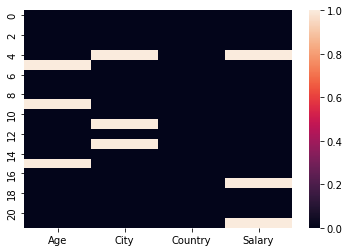

In [23]:
sns.heatmap(dd.isnull())

In [25]:
dd.isnull().sum()

Age        3
City       3
Country    0
Salary     3
dtype: int64

In [26]:
# Axis=0 -Rows
# Axis=1 -column

# dd.dropna(axis=0,inplace=true)

# Imputation

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imp=SimpleImputer(strategy='most_frequent')

dd['City']=imp.fit_transform(dd['City'].values.reshape(-1,1))
dd

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.0
1,31.0,Edmonto,Canada,3900.0
2,34.0,Toronto,Canada,8000.0
3,26.0,HongKong,Asia,66672.0
4,30.0,HongKong,America,NaN
5,NaN,HongKong,Asia,30007.0
6,43.0,BayArea,America,8300.0
7,38.0,Hyderabad,Asia,54666.0
8,50.0,newyork,America,67666.0
9,NaN,newyork,America,8888.0


In [32]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')

dd['Age']=imp.fit_transform(dd['Age'].values.reshape(-1,1))
dd['Salary']=imp.fit_transform(dd['Salary'].values.reshape(-1,1))

In [33]:
dd=dd.round()

In [34]:
dd

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.0
1,31.0,Edmonto,Canada,3900.0
2,34.0,Toronto,Canada,8000.0
3,26.0,HongKong,Asia,66672.0
4,30.0,HongKong,America,33740.0
5,32.0,HongKong,Asia,30007.0
6,43.0,BayArea,America,8300.0
7,38.0,Hyderabad,Asia,54666.0
8,50.0,newyork,America,67666.0
9,32.0,newyork,America,8888.0


# Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()
# dd['City']=le.fit_transform(dd['City'])

list1=['City','Country']
for val in list1:
    dd[val]=le.fit_transform(dd[val].astype(str))
    
dd    

,Age,City,Country,Salary
0,28.0,8,3,20000.0
1,31.0,3,3,3900.0
2,34.0,8,3,8000.0
3,26.0,5,2,66672.0
4,30.0,5,1,33740.0
5,32.0,5,2,30007.0
6,43.0,1,1,8300.0
7,38.0,6,2,54666.0
8,50.0,9,1,67666.0
9,32.0,9,1,8888.0
